# Import Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("adult.data", delimiter=",")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Check missing values

In [3]:
df.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

# Set Columns Name

In [4]:
columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "Y"]
df.columns = columns
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Y
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Convert datatypes

In [5]:
df = df.convert_dtypes()
df.dtypes

age                Int64
workclass         string
fnlwgt             Int64
education         string
education_num      Int64
marital_status    string
occupation        string
relationship      string
race              string
sex               string
capital_gain       Int64
capital_loss       Int64
hours_per_week     Int64
native_country    string
Y                 string
dtype: object

In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Remove blank space from target variable

In [7]:
df.Y = df.Y.str.lstrip()

# Transform target string to binary

In [8]:
df['Y'] = (df['Y'] == '<=50K').astype(int)
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Y
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.759183
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


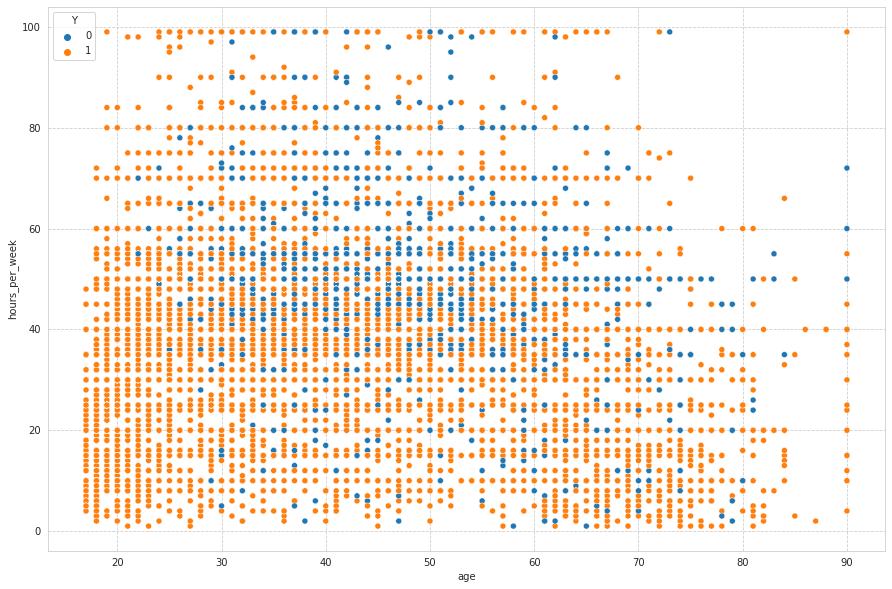

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize=(15,10))
sd = sns.scatterplot(x='age', y='hours_per_week', hue='Y', data=df)

# Calculate correlation coefficient

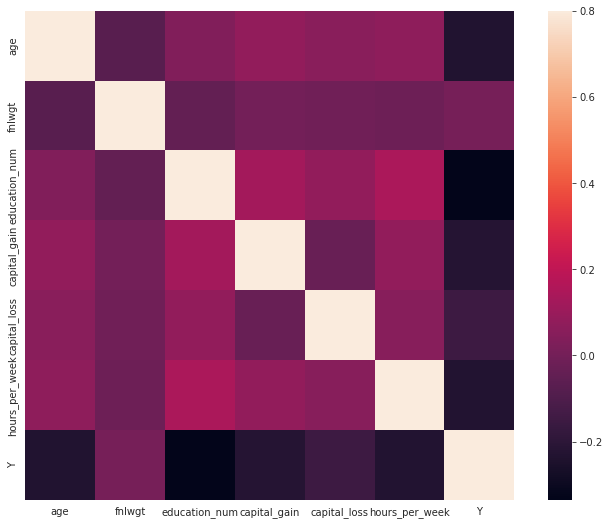

In [10]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

# Drop Unnecessary Columns

In [11]:
df.drop(["capital_gain", "age", "education_num"], axis=1, inplace=True)
df.tail()

,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_loss,hours_per_week,native_country,Y
32555,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,38,United-States,1
32556,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,40,United-States,0
32557,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,40,United-States,1
32558,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,20,United-States,1
32559,Self-emp-inc,287927,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,40,United-States,0


In [12]:
df = df.iloc[:10000]
df.describe()

,fnlwgt,capital_loss,hours_per_week,Y
count,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,1.906834e+05,87.671400,40.531300,0.762100
std,1.062808e+05,400.371885,12.277561,0.425819
min,1.930200e+04,0.000000,1.000000,0.000000
25%,1.184985e+05,0.000000,40.000000,1.000000
50%,1.791260e+05,0.000000,40.000000,1.000000
75%,2.393938e+05,0.000000,45.000000,1.000000
max,1.226583e+06,4356.000000,99.000000,1.000000


# Split features and target variable

In [13]:
X = df.iloc[:, :-1].values
y = df['Y'].to_numpy()
print(y)
X

[1 1 1 ... 1 1 1]


array([[' Self-emp-not-inc', 83311, ' Bachelors', ..., 0, 13,
        ' United-States'],
       [' Private', 215646, ' HS-grad', ..., 0, 40, ' United-States'],
       [' Private', 234721, ' 11th', ..., 0, 40, ' United-States'],
       ...,
       [' Private', 126743, ' 1st-4th', ..., 0, 53, ' Mexico'],
       [' Private', 301568, ' Some-college', ..., 0, 40,
        ' United-States'],
       [' Private', 120461, ' Some-college', ..., 0, 50,
        ' United-States']], dtype=object)

# Encoded Categorical Data

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
labelencoder_X_3 = LabelEncoder()
X[:, 3] = labelencoder_X_3.fit_transform(X[:, 3])
labelencoder_X_4 = LabelEncoder()
X[:, 4] = labelencoder_X_4.fit_transform(X[:, 4])
labelencoder_X_5 = LabelEncoder()
X[:, 5] = labelencoder_X_5.fit_transform(X[:, 5])
labelencoder_X_6 = LabelEncoder()
X[:, 6] = labelencoder_X_6.fit_transform(X[:, 6])
labelencoder_X_7 = LabelEncoder()
X[:, 7] = labelencoder_X_7.fit_transform(X[:, 7])
labelencoder_X_8 = LabelEncoder()
X[:, 10] = labelencoder_X_8.fit_transform(X[:, 10])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
# X = X[:, 1:]
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

# Split Train and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Standard Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Import Library and Fit the Model

In [17]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [18]:
classifier.score(X_test, y_test)

0.8396

# Calculate Prediction on Test Set

In [19]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.74698795 0.85803357]
recall: [0.51155116 0.94456177]
fscore: [0.6072478  0.89922091]
support: [ 606 1894]


# K-fold cross validation

In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
accuracies

array([0.82666667, 0.83866667, 0.81866667, 0.84533333, 0.85466667,
       0.82533333, 0.85466667, 0.82666667, 0.83466667, 0.81333333])

# Confusion Matrix

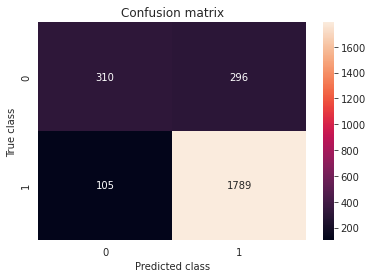

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

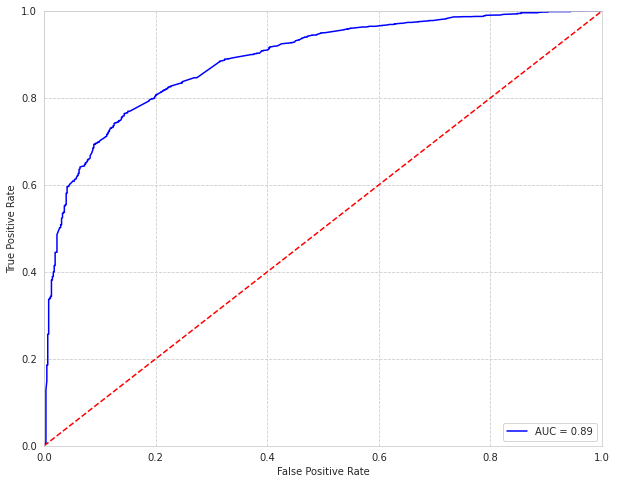

In [22]:
from sklearn.metrics import roc_curve, auc

preds = classifier.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()